# SFDC Profile: Disney Integration
## Goals: Gather Information Based Off Disney Conversion Process


In [ ]:
!pip install faker
!pip install pandas

In [2]:
 # Need to import unittestmock for dummy data on the json, salesforce connector, and json
from faker import Faker
import json
import os
import subprocess
import time
import datetime
import dateutil.parser
from simple_salesforce import Salesforce
faker = Faker()

ERROR: unknown command "import"
ERROR: unknown command "import"
ERROR: unknown command "import"
ERROR: unknown command "import"
ERROR: unknown command "import"
ERROR: unknown command "import"
ERROR: unknown command "import"
ERROR: unknown command "import"
ERROR: unknown command "import"


NameError: name 'faker' is not defined

In [118]:
##############################
# Org specific Information - #       
#   Fill Out the Following:  #
#      * Username            #
#      * Password            #
#      * Security Token      #
#      * Property Code       #
#      * Name of Floor Plan  #
#      * Name of Parking     #
##############################
username ='notify+devorg_project_disney_r3_13217@fortimize.com'
pw = '_1V9|1h7-P'
token = 'EE6GyOKBcOzvKRbKLc9g4eAjJ'
property_code = "1310"
floor_plan_name = 'Floor Plan 1FT 4BDRM'
parking_name = 'Test Covered Parking'

In [119]:
# Build out simple connector class that establishes a REST connection to SFDC
# DO NOT EDIT
class Connector(object):
    def __init__(self,username,pw,token,isSandbox):
        self.username = username
        self.pw=pw
        self.token=token
        self.isSandbox = isSandbox
        self.make_connection()
    def make_connection(self):
        if self.isSandbox:
            self.sf = Salesforce(username=self.username, password=self.pw, security_token=self.token, domain='test')
        else:
            self.sf= Salesforce(username=self.username, password=self.pw, security_token=self.token)
    def get_sf(self):
        return self.sf

connection = Connector(username,pw,token,True)


In [ ]:
def createAARs():

In [64]:
def delete_templates():       
    templates = connection.sf.query('Select Id FROM Integration_Template__c')['records']
    connection.sf.bulk.Integration_Template__c.delete([{'Id':record['Id']} for record in templates])
def delete_cases():
    cases = connection.sf.query('Select ID From Case')['records']
    connection.sf.bulk.Case.delete([{'Id':record['Id']} for record in cases])
def delete_accounts():
    accounts = connection.sf.query('Select Id FROM Account')['records']
    connection.sf.bulk.Account.delete([{'Id':record['Id']} for record in accounts])
def delete_APJO():
    apjos = connection.sf.query('Select Id FROM Account_Property_Junction_Object__c')['records']
    connection.sf.bulk.Account_Property_Junction_Object__c.delete([{'Id':record['Id']} for record in apjos])
def delete_apps():
    applications = connection.sf.query('Select Id FROM Application__c')['records']
    connection.sf.bulk.Application__c.delete([{'Id':record['Id']} for record in applications])
def delete_leases():    
    leases = connection.sf.query('Select Id FROM Contract')['records']
    connection.sf.bulk.Contract.delete([{'Id':record['Id']} for record in leases])
def delete_logs():
    logs = connection.sf.query('Select Id FROM Log__c')['records']
    connection.sf.bulk.Log__c.delete([{'Id':record['Id']} for record in logs])
    

def purge_data():
    delete_logs()
    delete_templates()
    delete_cases()
    delete_APJO()
    delete_accounts()
    delete_apps()
    
    #delete_leases()
#purge_data()

delete_logs()

In [120]:
# DO NOT EDIT
class LeasableItems():
    def __init__(self,sf):
        self.sf=sf.sf
    def get_id(self,name):
        self.records = self.sf.query("SELECT ID FROM Product2 WHERE Name ='{}'".format(name))
        return self.records['records'][0]['Id']
        
parkingItem = LeasableItems(connection)

floor_plan=LeasableItems(connection)
        

In [121]:
# DO NOT EDIT
class ApexAsyncJob():
    def __init__(self,sf):
        self.sf=sf.sf
    def get_record(self):
        self.record = self.sf.query("Select Id,CompletedDate,ExtendedStatus,JobItemsProcessed,JobType,MethodName,NumberOfErrors,Status,TotalJobItems,CreatedDate FROM AsyncApexJob WHERE ApexClass.Name='FMZ_BatchIntegrationConversion' ORDER BY CreatedDate DESC")
        return self.record['records'][0]
    def set_id_list(self,record_list):
        self.id_list = [i['Id'] for i in record_list]        
    def create_set_string(self):
        set_string = "("
        for i,id_ in enumerate(self.id_list):
            if i != len(self.id_list)-1:
                set_string+="'"+id_+"'"+","
            else:
                set_string+="'"+id_+"'"
        set_string+=")"
        return set_string
    def query_on_ids(self,set_string):
        self.records = self.sf.query("Select Id,CompletedDate,ExtendedStatus,JobItemsProcessed,JobType,MethodName,NumberOfErrors,Status,TotalJobItems,CreatedDate FROM AsyncApexJob WHERE ApexClass.Name='FMZ_BatchIntegrationConversion' AND ID IN {} ORDER BY CreatedDate DESC".format(set_string))['records']
        return self.records
        
        
    
        


### Create JSON that mimics the following format

<code>
 {
  "participantList":[
       {
         "Street":"34 Montclair Ave",
         "State":"New York",
         "Region":"United States",
         "PropertyCode":"1310",
         "PreferredName":"Davarious Leeroy",
         "PostalCode":"11752",
         "Mobile":"347-879-1231",
         "MobileCountryCode":"US",
         "MiddleName":"Thomas",
         "LastName":"Leeroy",
         "HousingGender":"Male",
         "FirstName":"Davarious",
         "EmergencyContactRelationship"  : "Mother",
         "EmergencyContactPhone":"203-123-1231",
         "EmergencyContactName":"Tessa Kline",
         "EmergencyContactCountryCode":"US",
         "Email":"mchen@hotmail.com",
         "DOB":"1994-04-04",
         "City":"Selden",
         "CandidateRefNum":"bee8cde6-8965-4aea-8fa9-7c5fafcdc27e-23423-sfvval",
         "floorPlan":
            {
               "LeasableItemId":"01t54000006lcZiAAI",
                "UnitAssignInDate":"2020-01-01",
                 "UnitAssignOutDate": "2020-06-06",
                 "Building": "B1000",
                 "Unit": "T101"
            },
          "parkingList":[
            {
                "VehicleState":"New York",
                "VehicleModel":"Cruze",
                "VehicleMake":"Chevy",
                "VehicleColor":"Red",
                 "VehicleYear":"2014",
                "LicensePlate":"HWM-2821",
                "LeasableItemId":"01t54000006m6fFAAQ"
            }
          ]
      }
   ]
}
</code>

In [122]:

class FakeData():
    def __init__(self,num,floor_name,parking_name):
        self.floor_name = floor_name
        self.parking_name=parking_name
        self.dataDict = {
            "participantList":[]
        }
        self.gen_data(num)
    def gen_data(self,num):
        for i in range(0,num):
            self.dataDict['participantList'].append(self.create_dict())
        
    def create_dict(self):
        return {
         "Street":faker.street_address(),
         "State":faker.state(),
         "Region":"United States",
         "PropertyCode":property_code,
         "PreferredName":faker.name(),
         "PostalCode":faker.zipcode(),
         "Mobile":faker.phone_number(),
         "MobileCountryCode":"US",
         "MiddleName":faker.last_name(),
         "LastName":faker.last_name(),
         "HousingGender":"Male",
         "FirstName":faker.first_name_male(),
         "EmergencyContactRelationship": "Mother",
         "EmergencyContactPhone":faker.phone_number(),
         "EmergencyContactName":faker.name_female(),
         "EmergencyContactCountryCode":"US",
         "Email":faker.ascii_email(),
         "DOB":faker.date(pattern='%Y-%m-%d',end_datetime=None),
         "City":faker.city(),
         "CandidateRefNum":faker.sha1(),
         "floorPlan":
            {
                "LeasableItemId":floor_plan.get_id(self.floor_name),
                "UnitAssignInDate":faker.date_between(start_date='today', end_date='today').isoformat(),
                 "UnitAssignOutDate": faker.date_between(start_date='+30d', end_date='+60d').isoformat(),
                 "Building": "B1000",
                 "Unit": "T101"
            },
          "parkingList":[
            {
                "VehicleState": faker.state(),
                "VehicleModel":"Cruze",
                "VehicleMake":"Chevy",
                "VehicleColor":"Red",
                 "VehicleYear":faker.year(),
                "LicensePlate":faker.license_plate(),
                "LeasableItemId":floor_plan.get_id(self.parking_name)
            }
          ]            
        }
        


In [123]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
from streamz.dataframe import DataFrame
from streamz import Stream
from IPython.display import display, HTML, clear_output

style.use('fivethirtyeight')

stream = Stream()
example = pd.DataFrame({
    'Id':[],
    'CompletedDate':[],
    'ExtendedStatus':[],
    'JobItemsProcessed':[],
    'JobType':[],
    'MethodName':[],
    'NumberOfErrors':[],
    'Status':[],
    'TotalJobItems':[],
    'CreatedDate':[]                        
    })
example.set_index('Id')

class Simulator():
    
    def __init__(self,num_templates,num_trials,async_apex):
        
        self.num_templates = num_templates
        self.num_trials = num_trials
        self.async_apex =async_apex
        self.timeout = 15 if self.num_templates < 10 else self.num_templates* 2.5
        self.record_list = []; # hold the id of the async apex job
        self.graph_data = []
        # Initiate plot
        self.init_plot()
    def init_plot(self):
        plt.xlabel('Time (seconds)')
        plt.ylabel('Frequency')
        plt.title('{} Template(s) for {} trial(s)'.format(self.num_templates,self.num_trials))
    
    def post_templates(self):
        LIMIT =200
        if self.num_templates < 200:   
            payload = FakeData(self.num_templates,floor_plan_name,parking_name).dataDict
            connection.sf.apexecute('integration/disney', method='POST', data=payload) # post templates
        else:
            remainder = self.num_templates % LIMIT
            total_loops = self.num_templates // LIMIT
            for i in range(total_loops):
                payload = FakeData(LIMIT,floor_plan_name,parking_name).dataDict
                connection.sf.apexecute('integration/disney', method='POST', data=payload)
            payload = FakeData(remainder,floor_plan_name,parking_name).dataDict
            connection.sf.apexecute('integration/disney', method='POST', data=payload)
                
        # Start the batch
        os.system('sfdx force:apex:execute -f ./anon.apex -u '+connection.username)
    def calculate_time_diff(self,record):
        start_datetime = dateutil.parser.parse(record['CreatedDate'])
        end_datetime= dateutil.parser.parse(record['CompletedDate'])
        return end_datetime- start_datetime
    def validate_records(self):
        
        while len(self.async_apex.records)!=0:
            time.sleep(3)
            for i,record in enumerate(self.async_apex.records):
                if record['CompletedDate'] is not None:
                    self.graph_data.append(
                        self.calculate_time_diff(self.async_apex.records.pop(i)).total_seconds()
                    )
                    clear_output(wait=True)
                    print(pd.Series(self.graph_data).describe())
                    
                    
                    
            self.async_apex.set_id_list(self.async_apex.records)
            if(len(self.async_apex.id_list)!=0):
                set_string = self.async_apex.create_set_string()
                self.async_apex.query_on_ids(set_string)
        plt.hist(self.graph_data) 
        plt.show()      
                                                     
    def simulate(self): 
    
        for i in range(0,self.num_trials):
            self.post_templates()
            time.sleep(3)
            record = self.async_apex.get_record()
            self.record_list.append(record)
            
        self.async_apex.set_id_list(self.record_list)
        set_string = self.async_apex.create_set_string()
        self.async_apex.query_on_ids(set_string)
        self.validate_records()        
        #self.calculate_time_diff(record)
                  
async_apex = ApexAsyncJob(connection)




count    1.0
mean     5.0
std      NaN
min      5.0
25%      5.0
50%      5.0
75%      5.0
max      5.0
dtype: float64


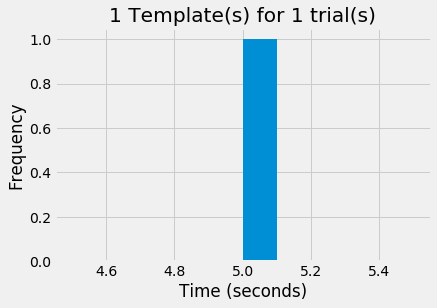

In [107]:
simulator_1_for_1 = Simulator(num_templates=1,num_trials=1,async_apex=async_apex)
simulator_1_for_1.simulate()

count    10.000000
mean      5.700000
std       2.002776
min       4.000000
25%       5.000000
50%       5.000000
75%       5.000000
max      11.000000
dtype: float64


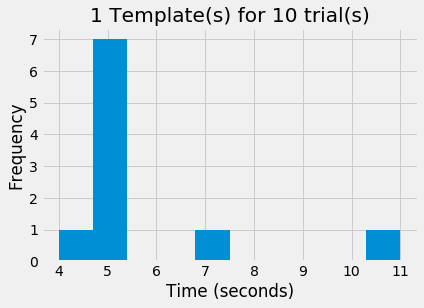

In [101]:
simulator_1_for_10 = Simulator(num_templates=1,num_trials=10,async_apex= async_apex)
simulator_1_for_10.simulate()

count     1.0
mean     11.0
std       NaN
min      11.0
25%      11.0
50%      11.0
75%      11.0
max      11.0
dtype: float64


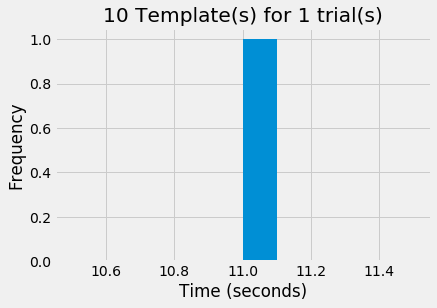

In [102]:
simulator_10_for_1 = Simulator(num_templates=10,num_trials=1,async_apex =async_apex)
simulator_10_for_1.simulate()

count     10.000000
mean      63.600000
std       43.990403
min       16.000000
25%       28.750000
50%       53.500000
75%       85.750000
max      141.000000
dtype: float64


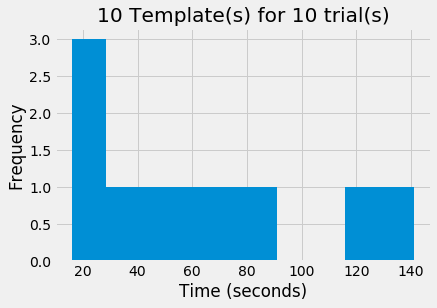

In [103]:
simulator_10_for_10 = Simulator(num_templates=10,num_trials=10,async_apex= async_apex)
simulator_10_for_10.simulate()

count     1.0
mean     75.0
std       NaN
min      75.0
25%      75.0
50%      75.0
75%      75.0
max      75.0
dtype: float64


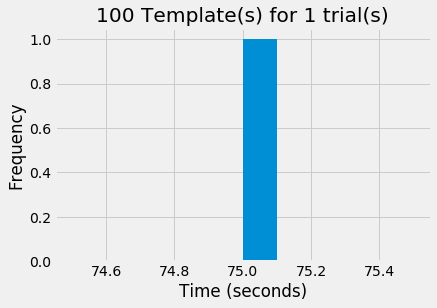

In [104]:
simulator_100_for_1 = Simulator(num_templates=100,num_trials=1,async_apex= async_apex)
simulator_100_for_1.simulate()

In [105]:
purge_data()

count      1.0
mean     189.0
std        NaN
min      189.0
25%      189.0
50%      189.0
75%      189.0
max      189.0
dtype: float64


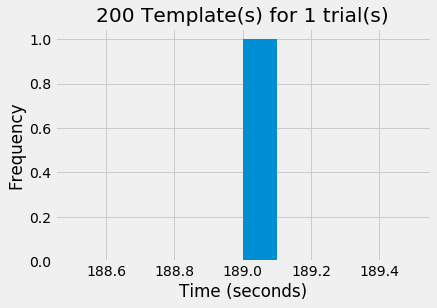

In [109]:
simulator_200_for_1 = Simulator(num_templates=200,num_trials=1,async_apex= async_apex)
simulator_200_for_1.simulate()

count      1.0
mean     967.0
std        NaN
min      967.0
25%      967.0
50%      967.0
75%      967.0
max      967.0
dtype: float64


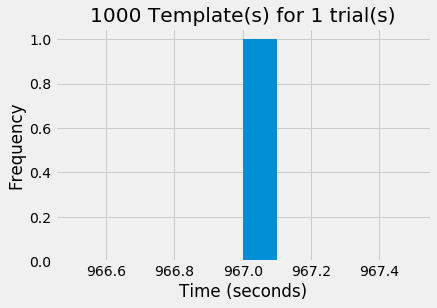

In [124]:
simulator_1000_for_1 = Simulator(num_templates=1000,num_trials=1,async_apex= async_apex)
simulator_1000_for_1.simulate()